In [64]:
import torch
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from model.cbow import CBOW
from config.config import Config

In [65]:
torch.set_default_device(Config.DEVICE)

In [66]:
MODEL_PATH = "saved/cbow_model.pth"
WORD2ID_PATH = "saved/wid.pth"

In [ ]:
wid = torch.load(WORD2ID_PATH)
VOCAB_LENGTH = len(wid)

In [ ]:
model = CBOW(VOCAB_LENGTH, Config.EMBEDDING_DIM)
model.load_state_dict(torch.load(MODEL_PATH))
model.eval()

In [69]:
embedding_weights = model.embedding_layer.weight.data
embedding_weights = embedding_weights.cpu()

In [74]:
tsne_reducer = TSNE(n_components = 2, perplexity = 30, random_state = 42)
reduced_embeddings = tsne_reducer.fit_transform(embedding_weights)
reduced_embeddings_x = reduced_embeddings[ : , 0]
reduced_embeddings_y = reduced_embeddings[ : , 1]

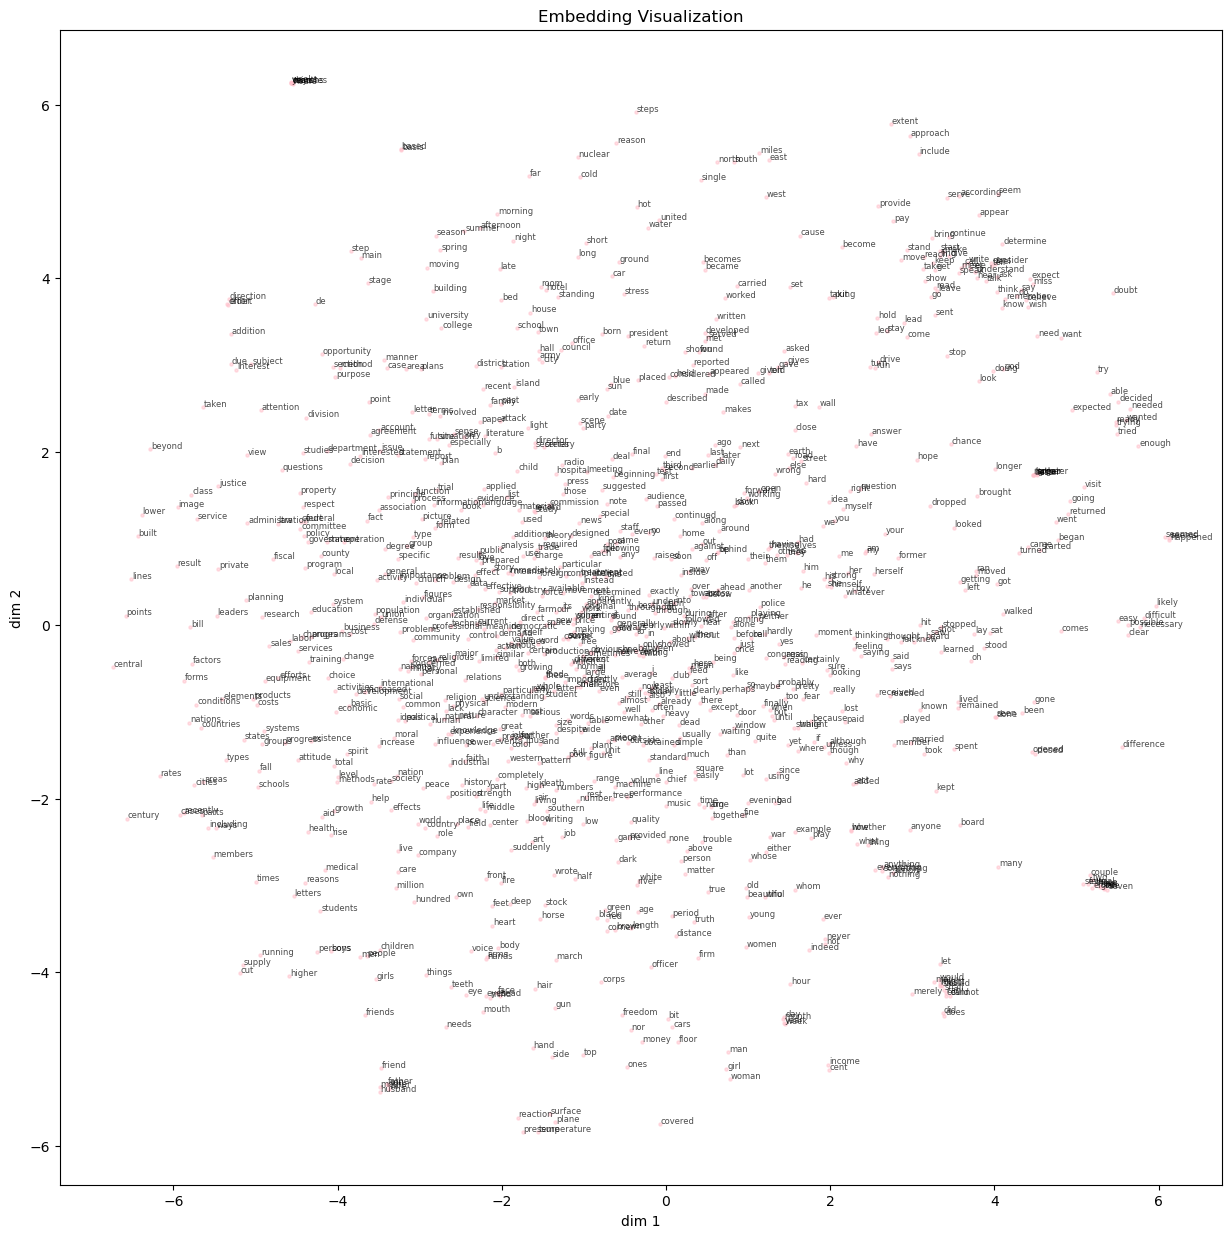

In [90]:
plt.figure(figsize = (15, 15))
plt.scatter(reduced_embeddings_x, reduced_embeddings_y, alpha = 0.5, s = 5, color = 'pink')

for word, idx in wid.items():
    x = reduced_embeddings_x[idx]
    y = reduced_embeddings_y[idx]
    plt.text(x + 0.01, y + 0.01, word, fontsize = 6, alpha = 0.7)

plt.title("Embedding Visualization")
plt.xlabel("dim 1")
plt.ylabel("dim 2")
plt.savefig("embeddings_plot.png", bbox_inches = 'tight')
plt.show()